# <center> **Plots figures Paper** <center>

## **Packages**

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import alphashape
import seaborn as sns
import pandas as pd
import json

from matplotlib.lines import Line2D
from matplotlib import rc
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter
from scipy.stats import pearsonr

from qibo import models
from qibo_analysis.qaoa_utils import exprectum_hamiltonian, create_gibbs_state, create_gausgibbs_state, expected_value, sample_state, build_maxcut_hamiltonian, build_mixer_hamiltonian

from variational_algorithms.tensor_networks.tn_algorithms import Pretraining
from variational_algorithms.use_cases.maxcut.instances import MaxCut_Instance
from variational_algorithms.use_cases.maxcut.cost_function import MaxCut_CostFunction
from variational_algorithms.tensor_networks.tensor_networks import TensorOperations

from sklearn.decomposition import PCA
from shapely.geometry import Polygon

## **Supplementary Figure 1**

In [3]:
################################################## Max Cut ##################################################

path_data_qaoa_tevo = f"logger_data/logger_data_pretraining_su4/pretraining_dmrg_vqe/case_0_max_cut_dmrg_vqe_linear.json"
        
with open(path_data_qaoa_tevo) as f:
    
    data_dmrg = json.load(f)

exact_energy_max_cut = data_dmrg['exact_energy']

energy_dmrg_max_cut = [abs(data_dmrg['energy_dmrg'][i] - exact_energy_max_cut)/abs(exact_energy_max_cut) for i in range(len(data_dmrg['energy_dmrg']))]

steps_dmrg_max_cut = len(energy_dmrg_max_cut)

path_data_qaoa_tevo_quantum = f"logger_data/logger_data_pretraining_su4/pretraining_dmrg_vqe/case_0_max_cut_dmrg_vqe_quantum_linear.json"
        
with open(path_data_qaoa_tevo_quantum) as f:
    
    data_tevo_vqe = json.load(f)

data_vqe_max_cut = [abs(data_tevo_vqe[i]['energy'] - exact_energy_max_cut)/abs(exact_energy_max_cut) for i in range(len(data_tevo_vqe))]


################################################## TSP ##################################################

path_data_qaoa_tevo = f"logger_data/logger_data_pretraining_su4/pretraining_dmrg_vqe/case_0_tsp_dmrg_vqe_linear.json"
        
with open(path_data_qaoa_tevo) as f:
    
    data_dmrg = json.load(f)

exact_energy_tsp = data_dmrg['exact_energy']

energy_dmrg_tsp = [abs(data_dmrg['energy_dmrg'][i] - exact_energy_tsp)/abs(exact_energy_tsp) for i in range(len(data_dmrg['energy_dmrg']))]

steps_dmrg_tsp = len(energy_dmrg_tsp)

path_data_qaoa_tevo_quantum = f"logger_data/logger_data_pretraining_su4/pretraining_dmrg_vqe/case_0_tsp_dmrg_vqe_quantum_linear.json"
        
with open(path_data_qaoa_tevo_quantum) as f:
    
    data_tevo_vqe_tsp = json.load(f)

data_vqe_tsp = [abs(data_tevo_vqe_tsp[i]['energy'] - exact_energy_tsp)/abs(exact_energy_tsp) for i in range(len(data_tevo_vqe_tsp))]

energy_dmrg_max_cut_r = [energy_dmrg_max_cut[i] for i in range(1, len(energy_dmrg_max_cut), 2)]
data_pre_dmrg_vqe_max_cut = energy_dmrg_max_cut_r[:24] + data_vqe_max_cut[:1000]

energy_dmrg_tsp_r = [energy_dmrg_tsp[i] for i in range(1, len(energy_dmrg_tsp), 2)]
data_pre_dmrg_vqe_tsp = energy_dmrg_tsp_r[:24] + data_vqe_tsp[:1000]

C:\Users\anava\AppData\Local\Temp\ipykernel_23092\3002450928.py:44: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax1.set_xlim(0, len(data_pre_dmrg_vqe_max_cut_smooth))


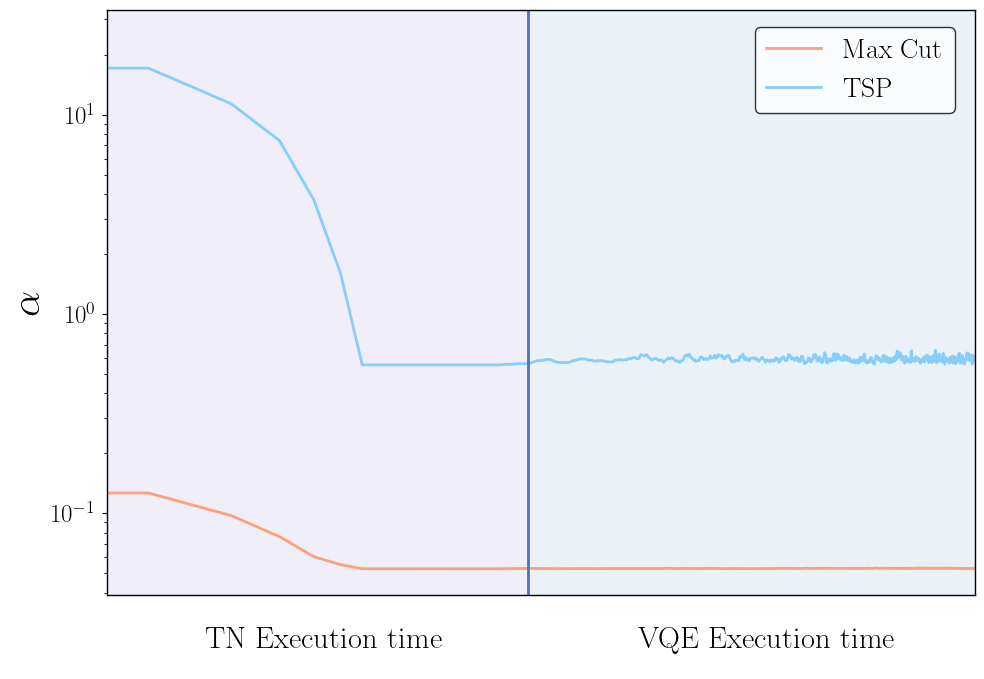

In [4]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

rc('text', usetex=True)
rc('font', family='serif')
plt.rcParams['savefig.dpi'] = 300

window_size = 5
data_pre_dmrg_vqe_max_cut_smooth = moving_average(data_pre_dmrg_vqe_max_cut, window_size=window_size)
data_pre_dmrg_vqe_tsp_smooth = moving_average(data_pre_dmrg_vqe_tsp, window_size=window_size)


start_point = 24 


fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [10, 1]}, figsize=(10, 7))


ax1.set_xscale('log')
ax1.set_yscale('log')


colors = {'tsp_vqe': '#87CEFA', 'max_cut_vqe': '#FFA07A'}
styles = {'quantum': '-', 'tn': '-'}  


sns.lineplot(ax=ax1, x=range(len(data_pre_dmrg_vqe_max_cut_smooth)), y=data_pre_dmrg_vqe_max_cut_smooth, 
             color=colors['max_cut_vqe'], linestyle=styles['tn'], linewidth=2, label='Max Cut')
sns.lineplot(ax=ax1, x=range(len(data_pre_dmrg_vqe_tsp_smooth)), y=data_pre_dmrg_vqe_tsp_smooth, 
             color=colors['tsp_vqe'], linestyle=styles['tn'], linewidth=2, label='TSP')



ax1.axvspan(0, 24, facecolor='#6a5acd', alpha=0.1)
ax1.axvspan(24, len(data_pre_dmrg_vqe_tsp_smooth), facecolor='#3288bd', alpha=0.1)
ax1.axvline(x=24, color='#4e71c5', linestyle='-', linewidth=2)


ax1.set_ylabel(r'$\alpha$', fontdict={'family': 'serif', 'size': 30})


ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, labeltop=False)
ax1.tick_params(axis='y', which='both', bottom=True, top=False, labelbottom=False, labeltop=False)
ax1.set_xlim(0, len(data_pre_dmrg_vqe_max_cut_smooth))
ax1.tick_params(axis='y', labelsize=18)

for spine in ax1.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)  


ax2.set_xlim(1, 1000)
ax2.set_ylim(0, 1)
ax2.axis('off') 


ax2.text(250, 0.5, 'TN Execution time', horizontalalignment='center', verticalalignment='center', fontdict={'family': 'serif', 'size': 22})
ax2.text(760, 0.5, 'VQE Execution time', horizontalalignment='center', verticalalignment='center', fontdict={'family': 'serif', 'size': 22})


legend = ax1.legend(title_fontproperties={'family': 'serif', 'size': 20}, prop={'family': 'serif', 'size': 20}, loc='lower left', bbox_to_anchor=(0.73, 0.80), ncol=1)
frame = legend.get_frame()
frame.set_edgecolor('black')
frame.set_linewidth(1)  

ax1.grid(False)
ax2.grid(False)
plt.tight_layout()
plt.show()

## **Supplementary Figure 2**

In [5]:
def concave_enclosing_area(puntos, alpha):

    alpha_shape = alphashape.alphashape(puntos, alpha)
    return alpha_shape.area, alpha_shape

def compute_probabilities(init_state, alpha, beta):
    point_probabilities = []
    for a in alpha:
        for b in beta:
            
            final_parameters = np.array([a, b])
            
            qaoa = models.QAOA(hamiltonian=hamiltonian, mixer=mixer_hamiltonian)
            
            qaoa.set_parameters(final_parameters)
            
            quantum_state = qaoa.execute(initial_state = init_state)
            
            probabilities = np.real(quantum_state*quantum_state.conj())
            
            point_probabilities.append(probabilities)
    return point_probabilities

n = 6
p = 0.5

G = nx.erdos_renyi_graph(n, p, seed = 4)

dict_values = exprectum_hamiltonian(G)

gibbs_state = create_gibbs_state(dict_values, t = 5)

expected_value_gibbs_state = expected_value(state = gibbs_state, dict_values = dict_values)


hamiltonian = build_maxcut_hamiltonian(graph = G)

mixer_hamiltonian = build_mixer_hamiltonian(graph = G)


alpha = np.linspace(0, 2 * np.pi, 50)
beta = np.linspace(0, 2 * np.pi, 50)

angle_params = []

point_probabilities = []

for a in alpha:
    for b in beta:
        
        angle_params.append([alpha,beta])
        
        final_parameters = np.array([a, b])
        
        qaoa = models.QAOA(hamiltonian=hamiltonian, mixer=mixer_hamiltonian)
        
        qaoa.set_parameters(final_parameters)
        
        quantum_state = qaoa.execute(initial_state = gibbs_state)
        
        probabilities = np.real(quantum_state*quantum_state.conj())
        point_probabilities.append(probabilities)
        

angle_params = np.array(angle_params)

angle_params = []
for a in alpha:
    for b in beta:
        angle_params.append([a,b])
angle_params = np.array(angle_params)

pca = PCA(n_components = 4)
pca_point_probabilities = pca.fit_transform(np.array(point_probabilities))
componentsDf = pd.DataFrame(data = pca_point_probabilities, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
componentsDf["alpha"] = angle_params[:,0]
componentsDf["beta"] = angle_params[:,1]

alpha = 50
area, alpha_shape = concave_enclosing_area(componentsDf[['PC1','PC2']].to_numpy(), alpha)

[Qibo 0.2.16|INFO|2025-04-11 13:52:46]: Using qibojit (numba) backend on /CPU:0


C:\Users\anava\AppData\Local\Temp\ipykernel_23092\2438582979.py:27: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=componentsDf, x="PC1", y="PC2",


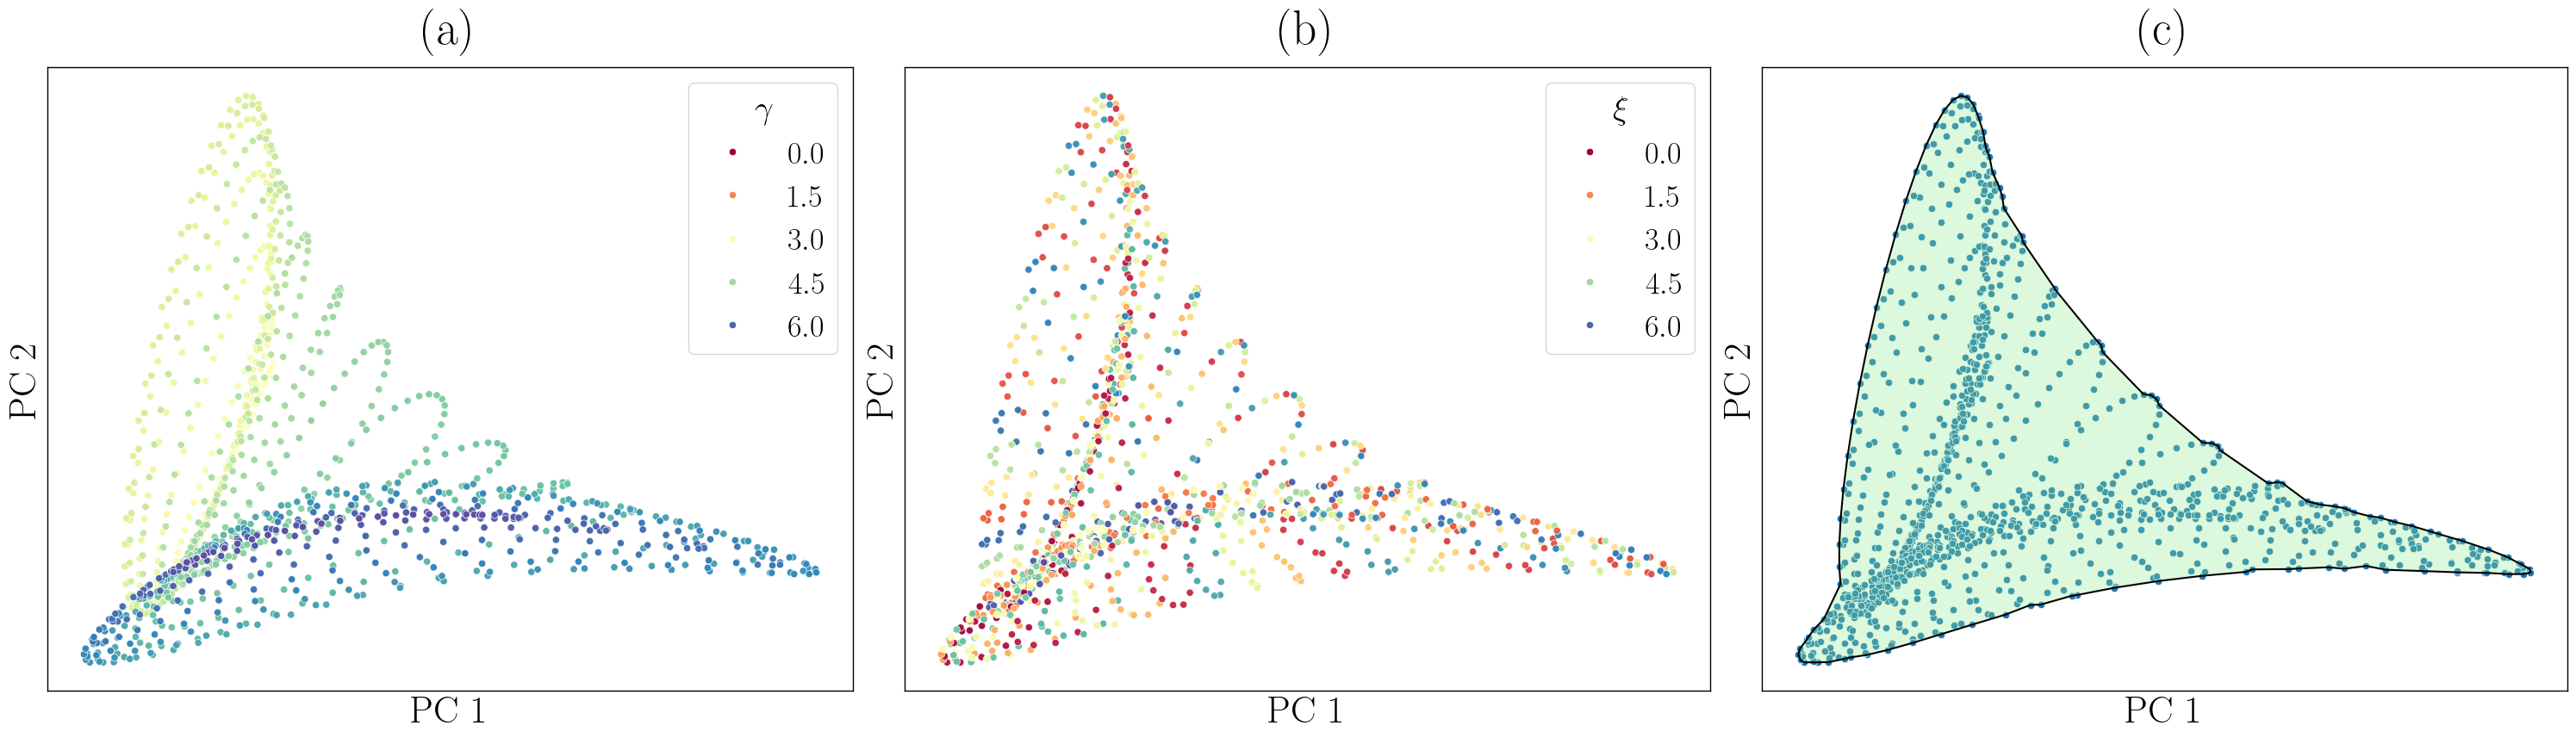

In [6]:
plt.rc('font', family='serif')
plt.rcParams['savefig.dpi'] = 300

fig, ax = plt.subplots(1, 3, figsize=(30, 10))  


scatter1 = sns.scatterplot(data=componentsDf, x="PC1", y="PC2", hue='alpha', 
                           palette=sns.color_palette("Spectral", as_cmap=True), ax=ax[0])

ax[0].set_xlabel("PC 1", fontsize=32)  
ax[0].set_ylabel("PC 2", fontsize=32)  

scatter1.legend(title=r"$\gamma$", title_fontsize='28', fontsize='26')


scatter2 = sns.scatterplot(data=componentsDf, x="PC1", y="PC2", hue='beta', 
                palette=sns.color_palette("Spectral", as_cmap=True), ax=ax[1])

ax[1].set_xlabel("PC 1", fontsize=32)  
ax[1].set_ylabel("PC 2", fontsize=32)

scatter2.legend(title=r"$\xi$", title_fontsize='28', fontsize='26')


alpha_shape = alphashape.alphashape(componentsDf[['PC1','PC2']].to_numpy(), alpha)

sns.scatterplot(data=componentsDf, x="PC1", y="PC2", 
                palette=sns.color_palette("Spectral", as_cmap=True), ax=ax[2])


if isinstance(alpha_shape, Polygon):
    x, y = alpha_shape.exterior.xy
    ax[2].plot(x, y, 'k-', lw=1.5)  
    ax[2].fill(x, y, 'lightgreen', alpha=0.3)  

ax[2].set_facecolor('white')
ax[2].set_xlabel("PC 1", fontsize=32)  
ax[2].set_ylabel("PC 2", fontsize=32)


for i in range(3):
    ax[i].set_aspect('equal', adjustable='box')
    ax[i].grid(False)


ax[0].set_title('(a)', fontsize=40, pad=20)
ax[1].set_title('(b)', fontsize=40, pad=20)
ax[2].set_title('(c)', fontsize=40, pad=20)

for ax in [ax[0], ax[1], ax[2]]:
    for spine in ax.spines.values():
        spine.set_edgecolor('black') 
        spine.set_linewidth(1)
        ax.set_xticks([])
        ax.set_yticks([])


plt.tight_layout()
plt.show()

## **Supplementary Figure 3**

In [7]:
n_nodes = 8

instance_max_cut = MaxCut_Instance(n_nodes)
instance_max_cut.import_from_file('logger_data/logger_data_pretraining_su4/gibbs_states_from_mpo_time_evolution/max_cut_instance_n_8_gibbs_states_for_mpo')

cost_function_max_cut = MaxCut_CostFunction(instance_max_cut)


n_qubits = cost_function_max_cut.num_bin_vars

exact_solution = float(instance_max_cut.brute_force()[0][2])

print('Exact solution:', exact_solution)


energy_x_list_list_steps = []
pb_log_y_list_list_steps = []
pearson_list_steps = []

for steps in [10, 35, 70, 95]:

    pre = Pretraining(ham = cost_function_max_cut.total_hamiltonian,
                    n_qubits = n_qubits,
                    chi_mpo = 32,
                    fidelity_mps = 1.0,
                    sweeps_mps = 100,
                    init_layers_mps = 2,
                    layers_su4 = 1,
                    connectivity_su4 = 'Linear'
                    )

    pretraining_tevo = pre.time_evolution_pretraining(n_steps = steps,
                                                    dt = 0.01,
                                                    order = 2, 
                                                    init_mps = None,
                                                    metrics = True)
    
    probs_list = []
    
    for i in range(2**n_qubits):
        sol_string = bin(i)[2:].zfill(n_qubits)
        prob = abs(TensorOperations(pre.final_mps.tensors).proyection_state(sol_string))**2
        probs_list.append((sol_string, prob))

    probs_list = sorted(probs_list, key=lambda tup: tup[1], reverse=True)

    energy_x_list = []
    pb_log_y_list = []
    
    for i in range(len(probs_list)):
        
        energy_x_list.append(cost_function_max_cut.check_cost_binary(str(probs_list[i][0])))
        pb_log_y_list.append(np.log(np.sqrt(probs_list[i][1])))
    
    energy_x_list_list_steps.append(energy_x_list)
    pb_log_y_list_list_steps.append(pb_log_y_list)
    
    coeficiente_pearson, valor_p = pearsonr(energy_x_list, pb_log_y_list)
    
    pearson_list_steps.append(coeficiente_pearson)

energy_x_list_list_chi = []
pb_log_y_list_list_chi = []
pearson_list_chi = []

for chi in [8, 16, 32, 64]:

    pre = Pretraining(ham = cost_function_max_cut.total_hamiltonian,
                    n_qubits = n_qubits,
                    chi_mpo = chi,
                    fidelity_mps = 1.0,
                    sweeps_mps = 100,
                    init_layers_mps = 2,
                    layers_su4 = 1,
                    connectivity_su4 = 'Linear'
                    )

    pretraining_tevo = pre.time_evolution_pretraining(n_steps = 60,
                                                    dt = 0.01,
                                                    order = 2, 
                                                    init_mps = None,
                                                    metrics = True)
    
    probs_list = []
    
    for i in range(2**n_qubits):
        sol_string = bin(i)[2:].zfill(n_qubits)
        prob = abs(TensorOperations(pre.final_mps.tensors).proyection_state(sol_string))**2
        probs_list.append((sol_string, prob))

    probs_list = sorted(probs_list, key=lambda tup: tup[1], reverse=True)

    energy_x_list = []
    pb_log_y_list = []
    
    for i in range(len(probs_list)):
        
        energy_x_list.append(cost_function_max_cut.check_cost_binary(str(probs_list[i][0])))
        pb_log_y_list.append(np.log(np.sqrt(probs_list[i][1])))
    
    energy_x_list_list_chi.append(energy_x_list)
    pb_log_y_list_list_chi.append(pb_log_y_list)
    
    coeficiente_pearson, valor_p = pearsonr(energy_x_list, pb_log_y_list)
    
    pearson_list_chi.append(coeficiente_pearson)

Exact solution: -11.0


C:\Users\anava\AppData\Local\Temp\ipykernel_23092\2851148445.py:105: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.25, 1, 0.95])


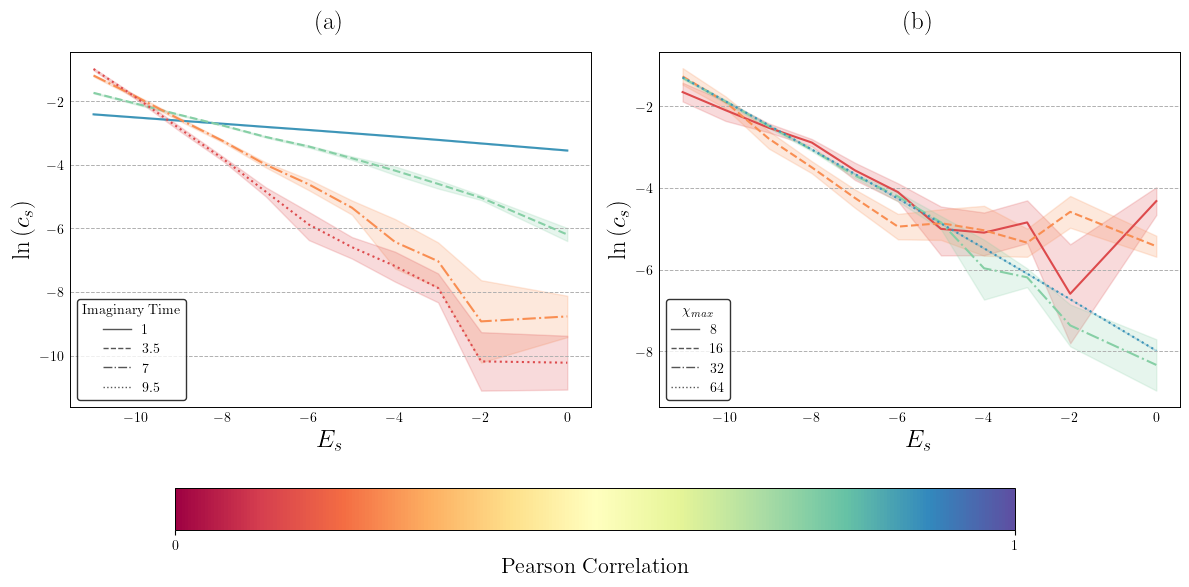

In [8]:
rc('text', usetex=True)
rc('font', family='serif')
plt.rc('font', family='serif', weight='light')
plt.rcParams['savefig.dpi'] = 300

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [2, 2]})


palette = sns.color_palette("Spectral", n_colors=7)
colors_steps = [palette[6], palette[5], palette[1], palette[0]]
linestyles = ['-', '--', '-.', ':']
custom_lines = [Line2D([0], [0], color='#555555', linestyle=linestyle, linewidth=1) for linestyle in linestyles]

data_list_steps = []
for i, (x, y, z) in enumerate(zip(energy_x_list_list_steps, pb_log_y_list_list_steps, pearson_list_steps), start=1):
    df_temp = pd.DataFrame({'x': x, 'y': y, 'z': z})
    df_temp['label'] = f'{i*2-1}'
    data_list_steps.append(df_temp)
df_steps = pd.concat(data_list_steps)


for i in range(4):
    sns.lineplot(
        data=df_steps[df_steps['label'] == f'{i*2+1}'],
        x='x', y='y',
        color=colors_steps[i],
        linestyle=linestyles[i],
        ax=ax1,
        label=f'{i*2+1}'
    )
ax1.tick_params(axis='x', which='both', length=0)
ax1.tick_params(axis='y', which='both', length=0)
ax1.xaxis.set_major_locator(plt.MaxNLocator(integer=True, nbins=8))
ax1.yaxis.set_major_locator(plt.MaxNLocator(integer=True, nbins=8))
ax1.yaxis.grid(True, linestyle='--', linewidth=0.7)
ax1.set_xlabel(r'$E_s$', fontdict={'family': 'serif', 'size': 18})
ax1.set_ylabel(r'$\ln{(c_s)}$', fontdict={'family': 'serif', 'size': 18})
ax1.legend(
    handles=custom_lines,
    labels=[1, 3.5, 7, 9.5],
    title=r"Imaginary Time",
    title_fontproperties={'family': 'serif', 'size': 10},
    prop={'family': 'serif', 'size': 10},
    frameon=True,
    edgecolor='black'
)
ax1.text(0.5, 1.05, '(a)', transform=ax1.transAxes, fontsize=18, fontfamily='serif',
         verticalalignment='bottom', horizontalalignment='center')

data_list_chi = []
for i, (x, y, z) in enumerate(zip(energy_x_list_list_chi, pb_log_y_list_list_chi, pearson_list_chi), start=1):
    df_temp = pd.DataFrame({'x': x, 'y': y, 'z': z})
    df_temp['label'] = f'{2**i}'
    data_list_chi.append(df_temp)
colors_chi = [palette[0], palette[1], palette[5], palette[6]]
df_chi = pd.concat(data_list_chi)

for i in range(4):
    sns.lineplot(
        data=df_chi[df_chi['label'] == f'{2**(i+1)}'],
        x='x', y='y',
        linestyle=linestyles[i],
        color=colors_chi[i],
        ax=ax2,
        label=f'{2**(i+1)}'
    )
ax2.tick_params(axis='x', which='both', length=0)
ax2.tick_params(axis='y', which='both', length=0)
ax2.xaxis.set_major_locator(plt.MaxNLocator(integer=True, nbins=8))
ax2.yaxis.set_major_locator(plt.MaxNLocator(integer=True, nbins=8))
ax2.yaxis.grid(True, linestyle='--', linewidth=0.7)
ax2.set_xlabel(r'$E_s$', fontdict={'family': 'serif', 'size': 18})
ax2.set_ylabel(r'$\ln{(c_s)}$', fontdict={'family': 'serif', 'size': 18})
ax2.legend(
    handles=custom_lines,
    labels=[f'{2**(i+3)}' for i in range(4)],
    title=r"$\chi_{max}$",
    title_fontproperties={'family': 'serif', 'size': 10},
    prop={'family': 'serif', 'size': 10},
    loc='lower left',
    frameon=True,
    edgecolor='black'
)
ax2.text(0.5, 1.05, '(b)', transform=ax2.transAxes, fontsize=18, fontfamily='serif',
         verticalalignment='bottom', horizontalalignment='center')


norm = plt.Normalize(0, 1)
sm = plt.cm.ScalarMappable(cmap=sns.color_palette("Spectral", as_cmap=True), norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation='horizontal', pad=0.4)
cbar.set_label('Pearson Correlation', fontsize=16, fontfamily='serif')
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['0', '1'])
cbar.outline.set_edgecolor('black')
cbar.ax.set_position([0.15, 0.05, 0.7, 0.09])
cbar.outline.set_linewidth(0.7)

for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(0.7)

plt.tight_layout(rect=[0, 0.25, 1, 0.95])
plt.show()